In [1]:
import pandas as pd
import ast
import numpy as np

In [2]:
dataset = pd.read_csv('./data/validation-helsinki-tatoeba-scores.csv',
                          sep="\t")

In [3]:
dataset.head()

,source,hypothesis,utilities,count
0,Ich spreche überhaupt kein Deutsch.,I can't speak German at all.,"{1.0529299: 28, 1.7164959: 51, 0.6175094: 7, 0...",4
1,Ich spreche überhaupt kein Deutsch.,I cannot speak German at all.,"{1.0529299: 28, 1.7164959: 51, 0.6175094: 7, 0...",2
2,Ich spreche überhaupt kein Deutsch.,I don't speak German at all.,"{1.0529299: 28, 1.7164959: 51, 0.6175094: 7, 0...",3
3,Ich spreche überhaupt kein Deutsch.,I don't know German at all.,"{1.0529299: 28, 1.7164959: 51, 0.6175094: 7, 0...",1
4,Ich war einmal in deinem Alter.,I got your age and father.,"{0.059961084: 32, 0.12713991: 10, 0.05761171: ...",1


In [4]:
dataset["utilities"] = dataset["utilities"].map(lambda x: ast.literal_eval(x))

In [5]:
import numpy as np
utilities = []

for util, c in dataset["utilities"][21].items():
    utilities += [util]

Die Deutschen lieben Bier und Würstchen.
The Germans like beer and surprising.


In [28]:
import numpy as np
utilities_repeated = []

for util, c in dataset["utilities"][0].items():
    utilities_repeated += [util * (c/100)] 

(array([ 2.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  2.,  3.,  0.,  1.,  2.,  1.,  2.,  1.,  1.,  3.,  5.,
         6.,  6.,  9.,  2., 10.,  9.,  4., 12.,  6., 12.,  6.,  7.,  9.,
        12., 13., 15., 14., 15., 16., 15., 17., 14., 21., 20., 21., 19.,
        16., 13., 18., 19., 20., 22., 23., 27., 15., 21., 18., 20., 24.,
        22., 21., 23., 17., 20., 15., 30., 20., 32., 17., 18., 23., 17.,
        15., 13., 12.,  9., 19.,  7.,  7.,  6.,  7.,  4.,  3.,  7.,  6.,
         3.,  3.,  2.,  0.,  1.,  0.,  1.,  3.,  1.]),
 array([-1.1267042 , -1.10599499, -1.08528578, -1.06457657, -1.04386737,
        -1.02315816, -1.00244895, -0.98173974, -0.96103053, -0.94032132,
        -0.91961211, -0.8989029 , -0.8781937 , -0.85748449, -0.83677528,
        -0.81606607, -0.79535686, -0.77464765, -0.75393844, -0.73322923,
        -0.71252003, -0.69181082, -0.67110161, -0.6503924 , -0.62968319,
        -0.60897398, -0.58826477, -0.56755557, -0.54684636, -0.526137

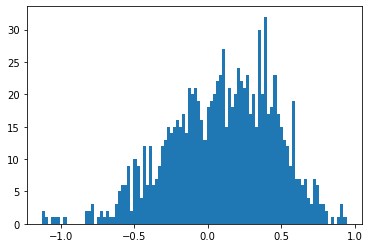

In [29]:
import matplotlib.pyplot as plt
plt.hist(utilities, bins=100)

In [30]:
from scipy import stats

In [31]:
stats.normaltest(utilities)

NormaltestResult(statistic=23.77988724499159, pvalue=6.859036194704437e-06)

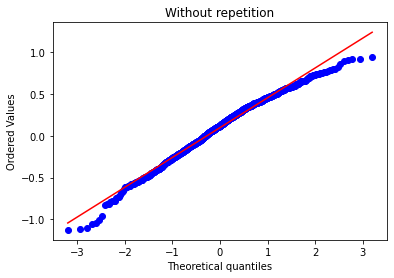

In [32]:
import matplotlib.pyplot as plt
import pylab
stats.probplot(utilities, dist="norm", plot=pylab, )
plt.title("Without repetition")
pylab.show()

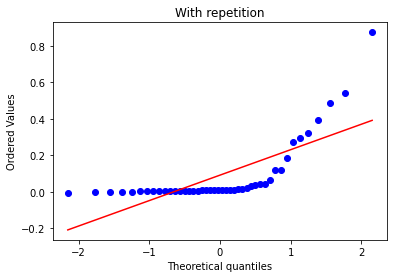

In [33]:
import matplotlib.pyplot as plt
import pylab
stats.probplot(utilities_repeated, dist="norm", plot=pylab, )
plt.title("With repetition")
pylab.show()

In [34]:
stats.normaltest(utilities_repeated)

NormaltestResult(statistic=43.19052453186559, pvalue=4.181159765890981e-10)